In [2]:
import import_ipynb
import smelder
from PIL import Image
import requests
import os,webbrowser

importing Jupyter notebook from smelder.ipynb


In [3]:
operations, gun_names_operations = smelder.search()
schema = smelder.get_schema()

arr = []
for (weapon1,weapon2) in operations:
    info1 = schema[weapon1]
    info2 = schema[weapon2]

    image1_url = info1['image_url']
    im1 = Image.open(requests.get(image1_url, stream=True).raw)
    im2 = Image.open(requests.get(image1_url, stream=True).raw)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

def gallery(array):
    width = 2
    height = len(array)//width
    return array.reshape(height,width)

def make_array(operations):
    defindex_array = [weapon for combo in operations for weapon in combo]
    image_array = [Image.open(requests.get(schema[weapon]['image_url'], stream=True).raw) for weapon in defindex_array]
    return np.array(image_array)

def get_image(defindex):
    return Image.open(requests.get(schema[defindex]['image_url'], stream=True).raw)

def get_array(operations):
    defindex_array = [[get_image(x),get_image(y)] for (x,y) in operations]
    return np.asarray(defindex_array)
    


arr = get_array(operations)

In [35]:
def save_images():
    for defindex,info in schema.items():
        url = info['image_url']
        image = Image.open(requests.get(url, stream=True).raw)
        image.save("./images/" + str(defindex) + ".png")

save_images()

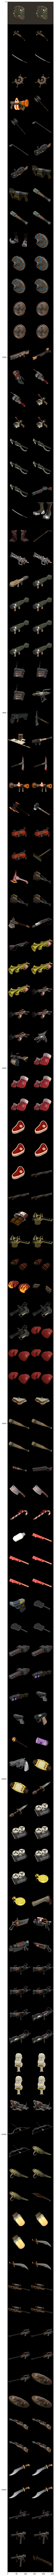

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def gallery(array, ncols=2):
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

def get_image(defindex):
    return Image.open('./images/' + str(defindex) + ".png").convert('RGB')

def make_array():
    return np.array([np.asarray(Image.open('./images/0.png').convert('RGB'))]*2)


def get_array(operations):
    return np.array([np.asarray(get_image(weapon)) for weapons in operations for weapon in weapons])

array = get_array(operations)
result = gallery(array)
plt.figure(figsize=(5,5*len(operations)), dpi=100)
plt.imshow(result)
plt.show()